## Parameter Setting

In [226]:
import numpy as np

n = np.arange(2, 15)

# Error Parameters
p_cx = 0.1 # CX gate error
p_e = 0.05 # single Pauli X error
p_E = 0.1 # Encoding error

# No Process
fid_NP = pow(1-p_cx,n-1)*pow(1-p_e,n-1) \
        + (1-pow(1-p_cx,n-1))/pow(2,n) \
        + pow(1-p_cx,n-1)*pow(1-p_e,n-2)*p_e/2

# Error Filtering
pn = (1-p_E)*pow(1-p_cx,n-1)*pow(pow(1-p_e,2)+pow(p_e,2),n-1) \
        + p_E*pow(1-p_cx,n-1)/pow(2,n-1) \
        + (1-pow(1-p_cx,n-1))/pow(2,n-1)
fid_EF = (1-p_E)*pow(1-p_cx,n-1)*pow(1-p_e,2*(n-1))/pn \
        + p_E*pow(1-p_cx,n-1)/(pow(2,2*n)*pn) \
        + (1-pow(1-p_cx,n-1))/(pow(2,2*n)*pn) \
        + (1-p_E)*pow(1-p_cx,n-1)*pow(1-p_e,2*(n-2))*pow(p_e,2)/(2*pn)

# Error Correction
fid_EC = pow(1-p_E,2)*pow(1-p_cx,n-1)*pow(pow(1-p_e,3)+3*p_e*pow(1-p_e,2),n-1) \
        + p_E*(2-p_E)*pow(1-p_cx,n-1)/pow(2,n+2) \
        + (1-pow(1-p_cx,n-1))/pow(2,n+2) \
        + pow(1-p_E,2)*pow(1-p_cx,n-1)*(n-1)*pow(pow(1-p_e,2)+3*p_e*pow(1-p_e,2),n-2)*(3*pow(p_e,2)*(1-p_e)+pow(p_e,3))/2

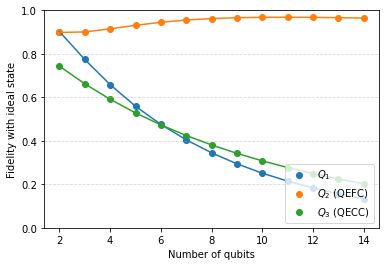

In [227]:
import matplotlib.pyplot as plt
  
# plotting the points
plt.scatter(n, fid_NP, label="$Q_1$") 
plt.plot(n, fid_NP) 

plt.scatter(n, fid_EF, label="$Q_2$ (QEFC)")
plt.plot(n, fid_EF)

plt.scatter(n, fid_EC, label="$Q_3$ (QECC)")
plt.plot(n, fid_EC)
  
# function to show the plot
plt.xlabel("Number of qubits")
plt.ylabel("Fidelity with ideal state")
#plt.xlim([0, 5]) 
plt.ylim([0, 1]) 
plt.grid(True, axis='y', alpha=0.5, linestyle='--')
plt.legend(loc='lower right')
plt.show()

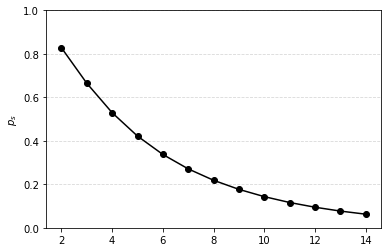

In [228]:
import matplotlib.pyplot as plt
  
# plotting the points
plt.scatter(n, pn, color='black') 
plt.plot(n, pn, color='black') 

# function to show the plot
#plt.xlabel("Number of qubits")
plt.ylabel("$p_s$")
#plt.xlim([0, 5]) 
plt.ylim([0, 1]) 
plt.grid(True, axis='y', alpha=0.5, linestyle='--')
#plt.legend(loc='lower right')
plt.show()